In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Data Preparation

In [2]:
dataFrame = pd.read_csv('heart.csv')

print(dataFrame.head())
print(dataFrame.info())
print(dataFrame.isnull().sum())

dataFrame = dataFrame.drop_duplicates()

dataFrame.to_csv('heart_cleaned.csv', index=False)

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp   
0   63    1   3     145   233    1        0       150     0      2.3    0  \
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       

# EDA

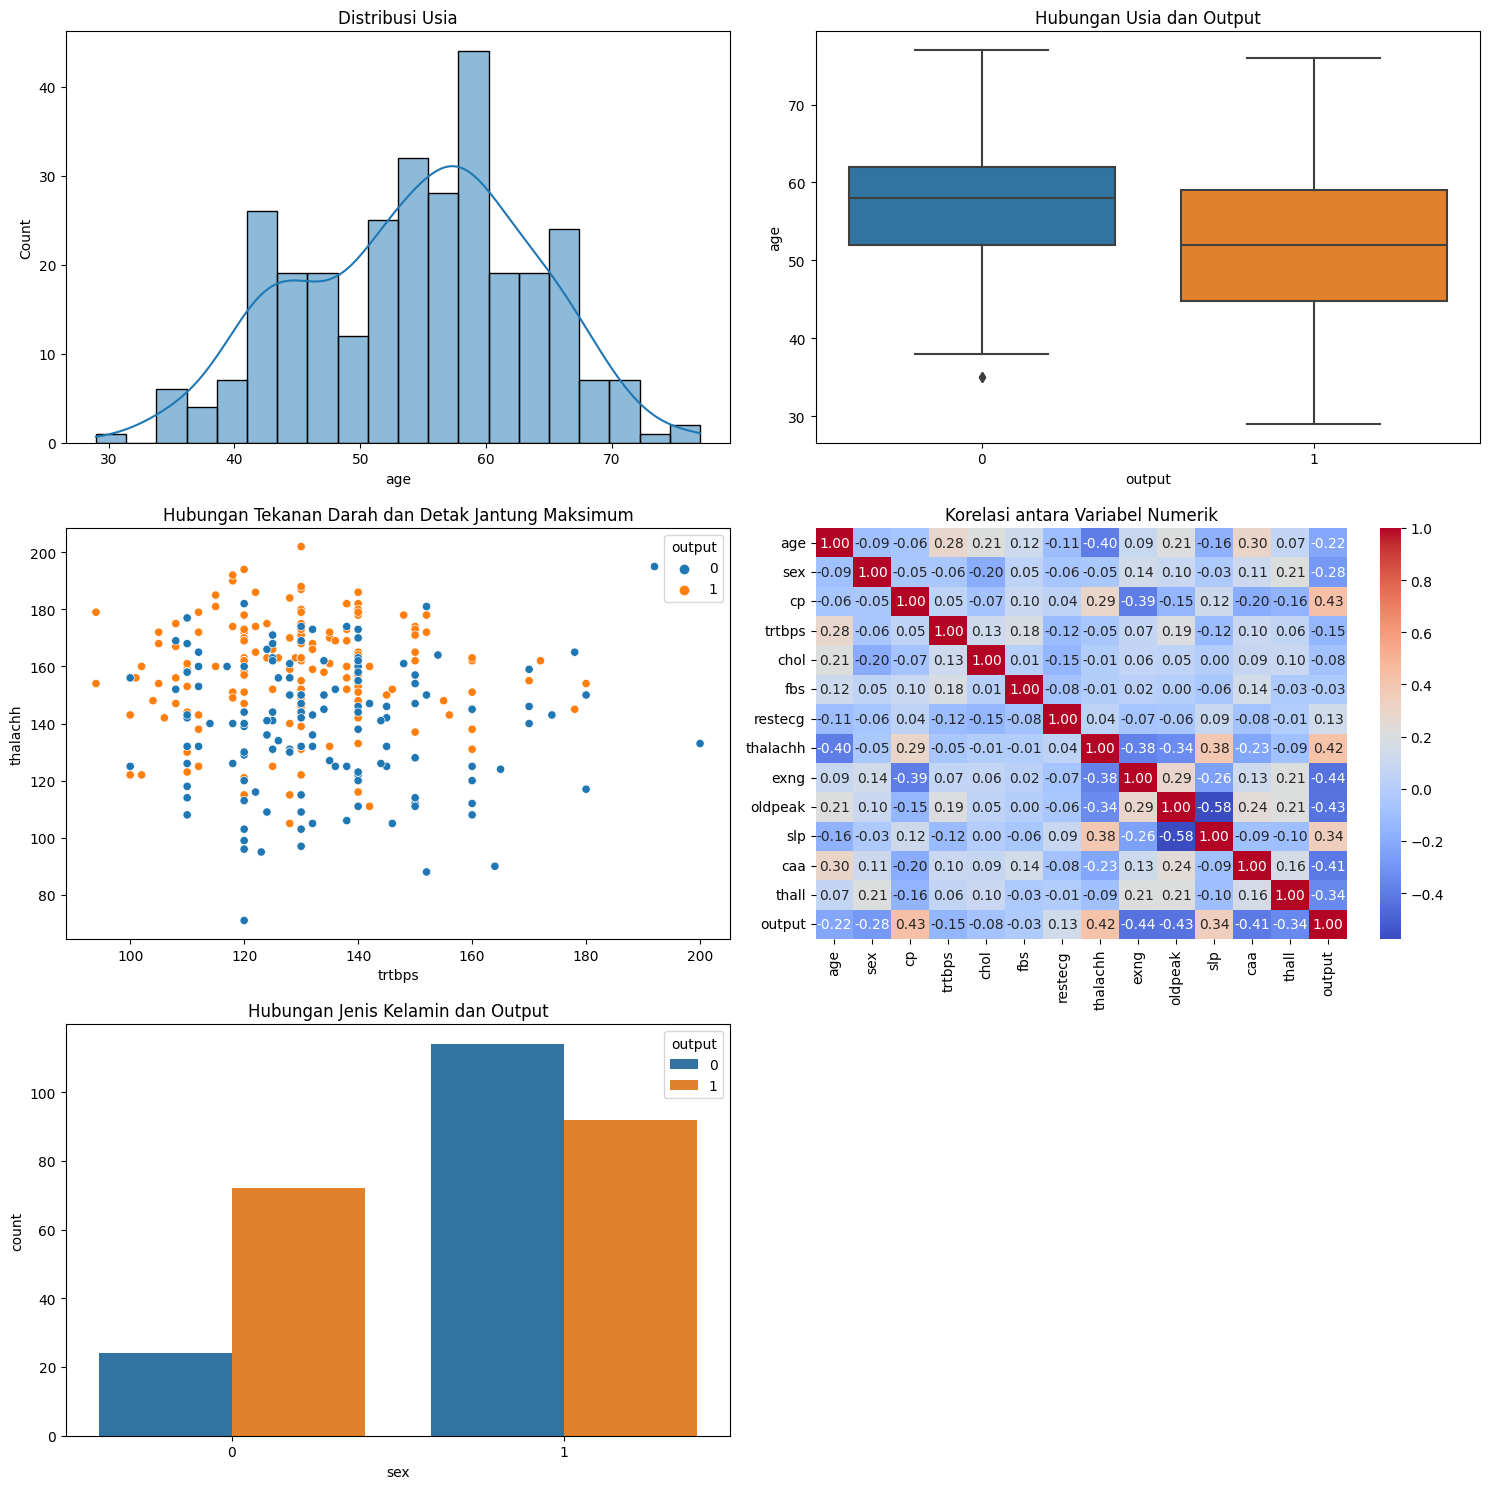

In [15]:
df = pd.read_csv('heart_cleaned.csv')

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.histplot(df['age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Usia')

sns.boxplot(x='output', y='age', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Hubungan Usia dan Output')

sns.scatterplot(x='trtbps', y='thalachh', hue='output', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Hubungan Tekanan Darah dan Detak Jantung Maksimum')

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1, 1])
axes[1, 1].set_title('Korelasi antara Variabel Numerik')

sns.countplot(x='sex', hue='output', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Hubungan Jenis Kelamin dan Output')

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

# Compare

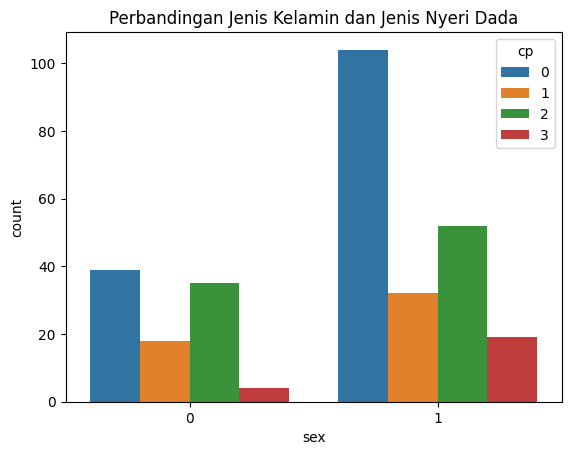

In [4]:
df = pd.read_csv('heart.csv')

sns.countplot(x='sex', hue='cp', data=df)
plt.title('Perbandingan Jenis Kelamin dan Jenis Nyeri Dada')
plt.show()

# Model

In [5]:
X = df.drop('output', axis=1)
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'XGBoost': XGBClassifier(),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')

XGBoost Accuracy: 0.819672131147541
K-Nearest Neighbor Accuracy: 0.6885245901639344
Logistic Regression Accuracy: 0.8852459016393442
Gaussian Naive Bayes Accuracy: 0.8688524590163934
Bernoulli Naive Bayes Accuracy: 0.8688524590163934
Support Vector Machine Accuracy: 0.7049180327868853


C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Accuracy: 0.8688524590163934


# Conclusion

In [6]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')

best_model_name = max(models, key=lambda k: accuracy_score(y_test, models[k].predict(X_test)))
best_model = models[best_model_name]

print(f'\nModel terbaik adalah {best_model_name} dengan akurasi {accuracy_score(y_test, best_model.predict(X_test)):.2f}')

XGBoost Accuracy: 0.819672131147541
K-Nearest Neighbor Accuracy: 0.6885245901639344
Logistic Regression Accuracy: 0.8852459016393442
Gaussian Naive Bayes Accuracy: 0.8688524590163934
Bernoulli Naive Bayes Accuracy: 0.8688524590163934
Support Vector Machine Accuracy: 0.7049180327868853


C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Accuracy: 0.8524590163934426

Model terbaik adalah Logistic Regression dengan akurasi 0.89
